In [1]:
import time
import requests
import datetime
import concurrent.futures

HOST = 'http://localhost:5011'
API_PATH = '/cv_word/M11166J'
ENDPOINT = HOST + API_PATH
MAX_THREADS = 5
CONCURRENT_THREADS = 5

def send_api_request():
    print ('Sending API request: ', ENDPOINT)
    r = requests.get(ENDPOINT)
    print ('Received: ', r.status_code)
        #    , r.text)



start_time = datetime.datetime.now()
print ('Starting:', start_time)

with concurrent.futures.ThreadPoolExecutor(MAX_THREADS) as executor:
    futures = [ executor.submit(send_api_request) for x in range (CONCURRENT_THREADS) ]
time.sleep(5)
end_time = datetime.datetime.now()
print ('Finished start time:', start_time, 'duration: ', end_time-start_time)


Starting: 2023-04-11 10:58:58.395996
Sending API request:  http://localhost:5011/cv_word/M11166J
Sending API request:  http://localhost:5011/cv_word/M11166J
Sending API request:  http://localhost:5011/cv_word/M11166J
Sending API request:  http://localhost:5011/cv_word/M11166J
Sending API request:  http://localhost:5011/cv_word/M11166J
Received:  200
Received:  200
Received:  200
Received:  200
Received:  200
Finished start time: 2023-04-11 10:58:58.395996 duration:  0:00:31.811734


In [174]:
def send_api_request():
    print ('Sending API request: ', ENDPOINT)
    r = requests.get(ENDPOINT)
    print ('Received: ', r.status_code)
        #    , r.text)
    return r.status_code

def sameUsers(CONCURRENT_THREADS, res, timings):
    start_time = datetime.datetime.now()
    print ('Starting:', start_time)

    with concurrent.futures.ThreadPoolExecutor(CONCURRENT_THREADS) as executor:
        futures = [ executor.submit(send_api_request) for x in range (CONCURRENT_THREADS) ]
    print("futures.result", futures[0].result())
    currentResult = []
    for i in futures:
        currentResult.append(i.result())
    res.append(currentResult)
    # res.append(futures[0].result())
    time.sleep(5)
    end_time = datetime.datetime.now()
    print ('Finished start time:', start_time, 'duration: ', end_time-start_time)
    timings.append(end_time-start_time)
    # df[]

loadsOverTime = [1, 5, 10, 20, 40, 60, 120]
loadsOverTime_20 = [i for i in range(1,21)]
loadsOverTime = loadsOverTime_20

res = []
timings = []
sameUsers(56, res, timings)
# sameUsers(3, res, timings)

# for i in loadsOverTime_20:
#     sameUsers(i, res, timings)

# for i in loadsOverTime:
#     sameUsers(i, res, timings)


Starting: 2023-04-11 14:35:31.642967
Sending API request:  http://localhost:5011/cv_word/M11166J
Sending API request:  http://localhost:5011/cv_word/M11166J
Sending API request:  http://localhost:5011/cv_word/M11166J
Sending API request:  http://localhost:5011/cv_word/M11166J
Sending API request:  http://localhost:5011/cv_word/M11166J
Sending API request:  http://localhost:5011/cv_word/M11166J
Sending API request:  http://localhost:5011/cv_word/M11166J
Sending API request:  http://localhost:5011/cv_word/M11166J
Sending API request:  http://localhost:5011/cv_word/M11166J
Sending API request:  http://localhost:5011/cv_word/M11166J
Sending API request:  http://localhost:5011/cv_word/M11166J
Sending API request:  http://localhost:5011/cv_word/M11166J
Sending API request:  http://localhost:5011/cv_word/M11166J
Sending API request:  http://localhost:5011/cv_word/M11166J
Sending API request:  http://localhost:5011/cv_word/M11166J
Sending API request:  http://localhost:5011/cv_word/M11166J
Sen

In [175]:
loadsOverTime = loadsOverTime_20
print("res: ", res)
print("timings: ", timings)

res:  [[200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 500, 200, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 429]]
timings:  [datetime.timedelta(seconds=74, microseconds=269863)]


In [139]:
# sqlalchemy.exc.TimeoutError: QueuePool limit of size 10 overflow 10 reached, 
# connection timed out, timeout 30.00 (Background on this error at: https://sqlalche.me/e/14/3o7r)

In [140]:
len(timings)

20

In [141]:
df = []
for i in range(len(loadsOverTime)):
    currItem = {}
    currItem["users"] = loadsOverTime[i]
    currItem["responses"] = res[i]
    currItem["total_timing"] = timings[i]
    df.append(currItem)
print(df)
print(df[0].keys())

[{'users': 1, 'responses': [200], 'total_timing': datetime.timedelta(seconds=12, microseconds=223303)}, {'users': 2, 'responses': [200, 200], 'total_timing': datetime.timedelta(seconds=11, microseconds=394614)}, {'users': 3, 'responses': [200, 200, 200], 'total_timing': datetime.timedelta(seconds=14, microseconds=33734)}, {'users': 4, 'responses': [200, 200, 200, 200], 'total_timing': datetime.timedelta(seconds=16, microseconds=806710)}, {'users': 5, 'responses': [200, 200, 200, 200, 200], 'total_timing': datetime.timedelta(seconds=19, microseconds=512709)}, {'users': 6, 'responses': [200, 200, 200, 200, 200, 200], 'total_timing': datetime.timedelta(seconds=22, microseconds=88347)}, {'users': 7, 'responses': [200, 200, 200, 200, 200, 200, 200], 'total_timing': datetime.timedelta(seconds=20, microseconds=529115)}, {'users': 8, 'responses': [200, 200, 200, 200, 200, 200, 200, 200], 'total_timing': datetime.timedelta(seconds=29, microseconds=719912)}, {'users': 9, 'responses': [200, 200, 

In [142]:
import pandas as pd

df = pd.DataFrame.from_records(df, columns = ['users', 'responses', 'total_timing'] )
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   users         20 non-null     int64          
 1   responses     20 non-null     object         
 2   total_timing  20 non-null     timedelta64[ns]
dtypes: int64(1), object(1), timedelta64[ns](1)
memory usage: 608.0+ bytes
None


,users,responses,total_timing
0,1,[200],0 days 00:00:12.223303
1,2,"[200, 200]",0 days 00:00:11.394614
2,3,"[200, 200, 200]",0 days 00:00:14.033734
3,4,"[200, 200, 200, 200]",0 days 00:00:16.806710
4,5,"[200, 200, 200, 200, 200]",0 days 00:00:19.512709
5,6,"[200, 200, 200, 200, 200, 200]",0 days 00:00:22.088347
6,7,"[200, 200, 200, 200, 200, 200, 200]",0 days 00:00:20.529115
7,8,"[200, 200, 200, 200, 200, 200, 200, 200]",0 days 00:00:29.719912
8,9,"[200, 200, 200, 200, 200, 200, 200, 200, 200]",0 days 00:00:27.902204
9,10,"[200, 200, 200, 200, 500, 200, 500, 200, 200, ...",0 days 00:00:27.953084


In [143]:
def successfulresponses(e):
    successful = 0
    for i in e:
        if i == 200:
            successful += 1
    return successful


def otherResponses(e):
    unsuccessful = []
    for i in e:
        if i != 200 and i not in unsuccessful:
            unsuccessful.append(i)
    return unsuccessful

df["total_responses"] = df["responses"].apply(lambda x: len(x))
df["successful_responses"] = df["responses"].apply(successfulresponses)
df["unsuccessful_responses"] = df["total_responses"] - df["successful_responses"]
# df["unsuccessful_responses"] = 100 - df["successful_responses"]
df["other_responses"] = df["responses"].apply(otherResponses)

In [144]:
df["average_timing"] = df["total_timing"]/df["successful_responses"]
df

,users,responses,total_timing,total_responses,successful_responses,unsuccessful_responses,other_responses,average_timing
0,1,[200],0 days 00:00:12.223303,1,1,0,[],0 days 00:00:12.223303
1,2,"[200, 200]",0 days 00:00:11.394614,2,2,0,[],0 days 00:00:05.697307
2,3,"[200, 200, 200]",0 days 00:00:14.033734,3,3,0,[],0 days 00:00:04.677911333
3,4,"[200, 200, 200, 200]",0 days 00:00:16.806710,4,4,0,[],0 days 00:00:04.201677500
4,5,"[200, 200, 200, 200, 200]",0 days 00:00:19.512709,5,5,0,[],0 days 00:00:03.902541800
5,6,"[200, 200, 200, 200, 200, 200]",0 days 00:00:22.088347,6,6,0,[],0 days 00:00:03.681391166
6,7,"[200, 200, 200, 200, 200, 200, 200]",0 days 00:00:20.529115,7,7,0,[],0 days 00:00:02.932730714
7,8,"[200, 200, 200, 200, 200, 200, 200, 200]",0 days 00:00:29.719912,8,8,0,[],0 days 00:00:03.714989
8,9,"[200, 200, 200, 200, 200, 200, 200, 200, 200]",0 days 00:00:27.902204,9,9,0,[],0 days 00:00:03.100244888
9,10,"[200, 200, 200, 200, 500, 200, 500, 200, 200, ...",0 days 00:00:27.953084,10,8,2,[500],0 days 00:00:03.494135500


In [145]:
df["average_timing_s"] = df["average_timing"].apply(lambda x: x.total_seconds())
df["average_timing_ms"] = df["average_timing"].apply(lambda x: x.microseconds)
df

,users,responses,total_timing,total_responses,successful_responses,unsuccessful_responses,other_responses,average_timing,average_timing_s,average_timing_ms
0,1,[200],0 days 00:00:12.223303,1,1,0,[],0 days 00:00:12.223303,12.223303,223303
1,2,"[200, 200]",0 days 00:00:11.394614,2,2,0,[],0 days 00:00:05.697307,5.697307,697307
2,3,"[200, 200, 200]",0 days 00:00:14.033734,3,3,0,[],0 days 00:00:04.677911333,4.677911,677911
3,4,"[200, 200, 200, 200]",0 days 00:00:16.806710,4,4,0,[],0 days 00:00:04.201677500,4.201677,201677
4,5,"[200, 200, 200, 200, 200]",0 days 00:00:19.512709,5,5,0,[],0 days 00:00:03.902541800,3.902541,902541
5,6,"[200, 200, 200, 200, 200, 200]",0 days 00:00:22.088347,6,6,0,[],0 days 00:00:03.681391166,3.681391,681391
6,7,"[200, 200, 200, 200, 200, 200, 200]",0 days 00:00:20.529115,7,7,0,[],0 days 00:00:02.932730714,2.932730,932730
7,8,"[200, 200, 200, 200, 200, 200, 200, 200]",0 days 00:00:29.719912,8,8,0,[],0 days 00:00:03.714989,3.714989,714989
8,9,"[200, 200, 200, 200, 200, 200, 200, 200, 200]",0 days 00:00:27.902204,9,9,0,[],0 days 00:00:03.100244888,3.100244,100244
9,10,"[200, 200, 200, 200, 500, 200, 500, 200, 200, ...",0 days 00:00:27.953084,10,8,2,[500],0 days 00:00:03.494135500,3.494135,494135


In [146]:

df.to_csv("stress_test_results.csv")

## Replicate results from here

In [11]:
import pandas as pd
df = pd.read_csv("stress_test_results_20.csv")

In [12]:
# !pip install matplotlib
# df["unsuccessful_responses"]

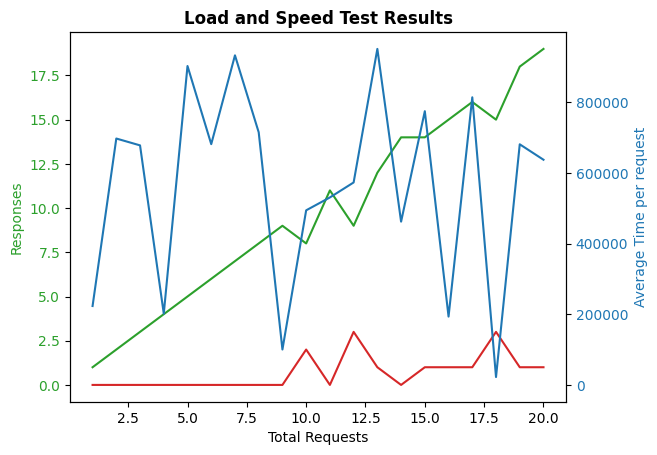

In [13]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# # Creating dataset
# x = np.arange(1.0, 100.0, 0.191)
# dataset_1 = np.exp(x**0.25) - np.exp(x**0.5)
# dataset_2 = np.sin(0.4 * np.pi * x**0.5) + np.cos(0.8 * np.pi * x**0.25)
num = 20
x = list(df["users"])[:num]
dataset_1 = list(df["successful_responses"])[:num]
dataset_1_unsuccessful = list(df["unsuccessful_responses"])[:num]
dataset_2 = list(df["average_timing_ms"])[:num]

# Creating plot with dataset_1
fig, ax1 = plt.subplots()


color_unsuccessful = 'tab:red'
color_success = "tab:green"
ax1.set_xlabel('Total Requests')
ax1.set_ylabel('Responses', color = color_success)
ax1.plot(x, dataset_1, color = color_success)
ax1.plot(x, dataset_1_unsuccessful, color = color_unsuccessful)
ax1.tick_params(axis ='y', labelcolor = color_success)

# Adding Twin Axes to plot using dataset_2
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Average Time per request', color = color)
ax2.plot(x, dataset_2, color = color)
ax2.tick_params(axis ='y', labelcolor = color)
# ax2.fill(x, dataset_2, 'b') 
ax2.fill(x, [0 for i in range(len(dataset_2))], 'b')            

# Adding title
plt.title('Load and Speed Test Results', fontweight ="bold")

# Show plot
plt.show()

In [173]:
# point where maximum response time taken:
max_average_response_time = max(list(df['average_timing_ms']))
# worst_case_response_timing = list(df[df["average_timing_ms"] == max_average_response_time])
calls_in_one_minute = (60 * 1000000)/max_average_response_time
print("Thus, to prevent system from crashing, maximum number of calls that can be made per minute is: ", calls_in_one_minute)
print("Rate limitted calls to api endpoint chosen to be safe: ", 55)

Thus, to prevent system from crashing, maximum number of calls that can be made per minute is:  63.09924564851827
Rate limitted calls to api endpoint chosen to be safe:  55


In [163]:
# best = df[df["users"] == 18]
# worst_case_response_timing = list(best['average_timing_ms'])[0]
# calls_in_one_minute = (60 * 1000000)/worst_case_response_timing
# print("Optimal performance of API call to '/cv_word/<id>' occurs when 20 concurrent calls made:")
# print("Worst case scenario response time per call: ", worst_case_response_timing)
# print("Thus, to prevent system from crashing, maximum number of calls that can be made per minute is", 
#       calls_in_one_minute)
# df[df["users"] == 20]

Optimal performance of API call to '/cv_word/<id>' occurs when 20 concurrent calls made:
Worst case scenario response time per call:  22297
Thus, to prevent system from crashing, maximum number of calls that can be made per minute is 2690.94497017536


,users,responses,total_timing,total_responses,successful_responses,unsuccessful_responses,other_responses,average_timing,average_timing_s,average_timing_ms
19,20,"[200, 200, 200, 200, 200, 200, 200, 500, 200, ...",0 days 00:00:50.108289,20,19,1,[500],0 days 00:00:02.637278368,2.637278,637278


In [164]:
# print("----With no error responses---------- ")
# best = df[df["users"] == 9]
# worst_case_response_timing = list(best['average_timing_ms'])[0]
# calls_in_one_minute = (60 * 1000000)/worst_case_response_timing
# print("Optimal performance of API call to '/cv_word/<id>' occurs when 9 concurrent calls made:")
# print("Worst case scenario response time per call: ", worst_case_response_timing)
# print("Thus, to prevent system from crashing, maximum number of calls that can be made per minute is", 
#       calls_in_one_minute)
# df[df["users"] == 9]

----With no error responses---------- 
Optimal performance of API call to '/cv_word/<id>' occurs when 9 concurrent calls made:
Worst case scenario response time per call:  100244
Thus, to prevent system from crashing, maximum number of calls that can be made per minute is 598.5395634651451


,users,responses,total_timing,total_responses,successful_responses,unsuccessful_responses,other_responses,average_timing,average_timing_s,average_timing_ms
8,9,"[200, 200, 200, 200, 200, 200, 200, 200, 200]",0 days 00:00:27.902204,9,9,0,[],0 days 00:00:03.100244888,3.100244,100244


In [162]:
worst_case_response_timing = list(best['total_timing'])[0].microseconds
calls_in_one_minute = (1 * 1000000)/worst_case_response_timing
calls_in_one_minute * 9

9.975570935176522

In [156]:
df[df["users"] == 8]

,users,responses,total_timing,total_responses,successful_responses,unsuccessful_responses,other_responses,average_timing,average_timing_s,average_timing_ms
7,8,"[200, 200, 200, 200, 200, 200, 200, 200]",0 days 00:00:29.719912,8,8,0,[],0 days 00:00:03.714989,3.714989,714989


FileNotFoundError: [Errno 2] No such file or directory: '/Users/maarunipandithurai/Documents/maars202/FYP-GoodHealth/env/lib/python3.9/site-packages/plotly/package_data/datasets/gapminder.csv.gz'

In [ ]:
# references:
# https://www.bmc.com/blogs/load-testing-performance-testing-and-stress-testing-explained/

# https://www.geeksforgeeks.org/use-different-y-axes-on-the-left-and-right-of-a-matplotlib-plot/